# This is a test of clustering players

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [20, 20]
pd.set_option("precision", 5)

# We load the dataset

In [8]:
players = pd.read_csv('data/player_zscore.csv').drop(columns=['index', 'Allstar'], axis=1)
players.head()

,Player,Year,Age,G,MP,PER,OWS,DWS,WS,BPM,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,Years_In_NBA,PR
0,A.J. Bramlett,2000,-0.14823,-0.85659,-0.95406,-1.03173,-1.13728,-0.92538,-1.07143,6.87167,...,-1.00000,-1.00000,0.39583,-0.49098,-0.22840,-1.00000,-0.85295,-1.00000,-0.81376,-93.48029
1,A.J. English,1991,-0.04658,0.27010,0.24736,-0.16969,-1.51531,-0.38253,-0.90485,0.71945,...,0.06211,0.07838,-0.15245,-0.38477,-0.30356,0.35972,-0.39339,-0.46419,-0.52246,0.64845
2,A.J. English,1992,-0.02049,0.47470,0.36824,-0.00111,-0.91166,-0.41519,-0.61407,1.06421,...,0.18394,0.06429,-0.20649,-0.44737,-0.36447,-0.05047,-0.42142,-0.77015,-0.21695,0.42700
3,A.J. Guyton,2001,-0.19263,-0.39193,-0.51749,-0.17346,-0.72351,-1.07544,-0.89178,1.64086,...,-0.67383,-0.75941,-0.71162,-0.68905,-0.69569,0.04428,-0.55328,-0.54526,-0.82164,-1141.77162
4,A.J. Guyton,2002,-0.14667,-0.17021,-0.53455,-0.07423,-1.00000,-1.00000,-0.96382,1.23934,...,-0.66363,-0.69930,-0.71721,-0.72710,-0.72401,-0.01530,-0.69799,-0.55405,-0.63874,125.91641


We'll drop the seasons of players where it was not yet their 3rd season so those who weren't in the league for long skew the data

In [9]:
players_atleast_3 = players[players.Years_In_NBA >= 3]
players_atleast_3.head()

,Player,Year,Age,G,MP,PER,OWS,DWS,WS,BPM,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,Years_In_NBA,PR


In [238]:
players.columns

Index(['Player', 'Pos', 'Age', 'Team', 'G', 'MP', 'PER', 'OWS', 'DWS', 'WS',
       'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'Year', 'Allstar',
       'Years_In_NBA', 'PR'],
      dtype='object')

We store the numerical columns that we'll use in the model

In [382]:
value_cols = ['G', 'MP', 'PER', 'OWS', 'DWS', 'WS',
       'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'Years_In_NBA', 'PR']

In [244]:
players_pivoted = players_atleast_3.pivot_table(index="Player", values=value_cols, columns="Year")

In [216]:
players_pivoted.reset_index().head()

Player   2P                                         ...  eFG%  \
Year                1988 1989 1990 1991 1992 1993 1994 1995 1996 ...  2009   
0        A.C. Green  3.9  4.8  4.5  3.0  4.5  4.4  5.6  3.3  2.5 ...   NaN   
1     A.J. Bramlett  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   
2      A.J. English  NaN  NaN  NaN  3.5  4.4  NaN  NaN  NaN  NaN ...   NaN   
3       A.J. Guyton  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   
4      A.J. Hammons  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN ...   NaN   

                                                     
Year 2010 2011 2012 2013 2014 2015 2016   2017 2018  
0     NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  
1     NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  
2     NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  
3     NaN  NaN  NaN  NaN  NaN  NaN  NaN    NaN  NaN  
4     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.464  NaN  

[5 rows x 714 columns]

In [318]:
players_pivoted.shape

(1360, 754)

In [245]:
player_names = players_pivoted.index
player_names

Index(['A.J. Guyton', 'A.J. Price', 'Aaron Brooks', 'Aaron Gordon',
       'Aaron Gray', 'Aaron Harrison', 'Aaron McKie', 'Aaron Williams',
       'Acie Earl', 'Acie Law',
       ...
       'Yinka Dare', 'Zach LaVine', 'Zach Randolph', 'Zan Tabak',
       'Zarko Cabarkapa', 'Zaza Pachulia', 'Zeljko Rebraca', 'Zendon Hamilton',
       'Zoran Planinic', 'Zydrunas Ilgauskas'],
      dtype='object', name='Player', length=1360)

In [246]:
len(player_names)

1360

In [301]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [217]:
imputer = preprocessing.Imputer(strategy="mean")
scaler = preprocessing.StandardScaler()

In [21]:
processing_pipeline = make_pipeline(
    imputer,
    scaler
)

In [247]:
players_processed = processing_pipeline.fit_transform(players_pivoted)

In [292]:
players_processed

array([[ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         1.71114278e-01,  7.00879843e-01,  1.29015097e+00],
       ...,
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16],
       [ 0.00000000e+00, -1.78775571e-15,  1.41233373e-15, ...,
         0.00000000e+00,  4.58045066e-16,  4.45332287e-16]])

In [248]:
from scipy.sparse import coo_matrix
players_sparse = coo_matrix(players_processed)

In [249]:
players_sparse

<1360x754 sparse matrix of type '<class 'numpy.float64'>'
	with 699381 stored elements in COOrdinate format>

SVD manually done; dimensionality not decreased

In [250]:
from scipy.sparse.linalg import svds

In [253]:
U,s, V = svds(players_sparse,  k=10)
players_diag_matrix = np.zeros((s.shape[0], s.shape[0]))

for i in range(s.shape[0]):
    players_diag_matrix[i,i] = s[i]

players_full_svd = U @ players_diag_matrix @ V

In [254]:
players_full_svd.shape

(1360, 754)

TruncatedSVD used so we can reduce the dimensionality of the data

In [275]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42)

In [276]:
players_svd = svd.fit_transform(players_sparse)

DBSCAN used here

In [290]:
estimator_dbscan = DBSCAN(eps=1, min_samples=150)
dbscan_labels = estimator_dbscan.fit(X=players_svd).labels_

In [291]:
dbscan_labels

array([-1, -1, -1, ..., -1, -1, -1])

In [283]:
DBSCAN?

In [82]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [85]:
GridSearchCV?

In [298]:
param_space = {
    'eps': np.linspace(0.3, 3, 20),
    'min_samples': range(3, 100)
}

In [134]:
from sklearn.metrics import silhouette_score

We had to create our own silhouette scoring function because RandomizedSearchCV assumes true classes are provided, but as DBSCAN/KMeans is unsupervised learning, we provide the labels of the fit as the "true class"

In [263]:
def silhouette_cv(estimator, X, y=None):
    y_pred = estimator.fit(X).labels_
    print(pd.Series(y_pred).unique())
    print(estimator.get_params())
    return silhouette_score(X, y_pred)

In [299]:
random = RandomizedSearchCV(estimator=estimator_dbscan,
                           param_distributions=param_space,
                           scoring=silhouette_cv,
)

In [300]:
random.fit(players_full_svd)

[-1]
{'algorithm': 'auto', 'eps': 1.1526315789473685, 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 30, 'n_jobs': 1, 'p': None}


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [295]:
clusterer = DBSCAN(algorithm='auto', eps=2.7222222222222223, leaf_size=30,
    metric='euclidean', metric_params=None, min_samples=28, n_jobs=1,
    p=None)

In [296]:
clusterer.fit(players_svd).labels_

array([ 0,  0,  0, ...,  0,  0, -1])

In [297]:
silhouette_score(players_svd, clusterer.labels_)

0.3752284130611319

In [228]:
print(random.best_estimator_)

DBSCAN(algorithm='auto', eps=2.7222222222222223, leaf_size=30,
    metric='euclidean', metric_params=None, min_samples=28, n_jobs=1,
    p=None)


In [313]:
clusters_dbscan = clusterer.labels_

In [158]:
pd.DataFrame?

In [233]:
player_clusters = pd.DataFrame(data=clusters, index=player_names, columns=['cluster'])
player_clusters.cluster.value_counts()

-1    1513
 0    1004
Name: cluster, dtype: int64

Trying KMeans now

In [303]:
estimator_kmeans = KMeans(random_state=42, n_clusters=5)

estimator_kmeans.fit(players_processed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [314]:
clusters_kmeans = estimator_kmeans.labels_
clusters

array([1, 1, 1, ..., 1, 1, 4], dtype=int32)

In [305]:
centroids = estimator_kmeans.cluster_centers_
centroids

array([[-9.24446373e-33,  3.59043100e-02,  3.71700893e-02, ...,
         5.04225635e-02,  1.59661857e-01,  1.77775853e-01],
       [-5.72877667e-02, -6.46383447e-02, -8.14323909e-02, ...,
        -9.38223157e-02, -9.91953112e-02, -1.24006512e-01],
       [-9.24446373e-33, -1.78775571e-15,  1.41233373e-15, ...,
        -2.13879681e-01,  3.11833271e-01,  8.13854804e-01],
       [ 2.56693262e+00,  2.82172457e+00,  3.57159810e+00, ...,
         1.63609266e-01,  1.85637809e-01,  2.03897985e-01],
       [-7.70371978e-33, -1.78775571e-15,  1.41233373e-15, ...,
         1.97443932e+00,  1.45413307e+00,  1.43407964e+00]])

In [306]:
from sklearn.metrics import euclidean_distances

In [307]:
centroid_distances = euclidean_distances(centroids)
centroid_distances

array([[ 0.        , 27.18082272, 36.97658939, 39.38249389, 38.23717444],
       [27.18082272,  0.        , 27.57007061, 42.63078437, 35.82766972],
       [36.97658939, 27.57007061,  0.        , 48.87431355, 37.63082829],
       [39.38249389, 42.63078437, 48.87431355,  0.        , 53.82597014],
       [38.23717444, 35.82766972, 37.63082829, 53.82597014,  0.        ]])

In [320]:
players_pivoted['clusters'] = clusters_kmeans
players_pivoted.head()

2P                                                ...     \
Year         1990 1991 1992 1993 1994 1995 1996 1997 1998 1999   ...      
Player                                                           ...      
A.J. Guyton   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
A.J. Price    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
Aaron Brooks  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
Aaron Gordon  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      
Aaron Gray    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ...      

             Years_In_NBA                                          clusters  
Year                 2010 2011 2012 2013 2014 2015 2016 2017  2018           
Player                                                                       
A.J. Guyton           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN        1  
A.J. Price            NaN  NaN  3.0  4.0  5.0  6.0  NaN  NaN   NaN        1  
Aaron Brooks          3.0  4.0  NaN  5.0  6.0  7.0  8.0  9.0  10.0        1  
Aaron Gordon          NaN  NaN  NaN  NaN  NaN  NaN  NaN  3.0   4.0        1  
Aaron Gray            3.0  4.0  5.0  6.0  7.0  NaN  NaN  NaN   NaN        1  

[5 rows x 755 columns]

An important aspect when using K-means is that the distances are related to the variable scales. So we have to normalize the data before using this algorithm for clustering.

In [363]:
players_atleast_3.drop(columns=['Allstar'], axis=1, inplace=True)
players_atleast_3.head()

,Player,Pos,Age,Team,G,MP,PER,OWS,DWS,WS,...,FTA,ORB,DRB,TRB,AST,STL,BLK,Year,Years_In_NBA,PR
199,Armen Gilliam,PF,25,TOT,76,2426,16.6,2.3,2.3,4.5,...,5.5,2.8,5.1,7.9,1.3,0.9,0.7,1990,3,16.11847
204,Brad Lohaus,PF,25,TOT,80,1943,13.6,0.9,2.4,3.3,...,1.3,1.2,3.8,5.0,2.1,0.7,1.1,1990,3,6.76391
206,Brian Rowsom,PF,24,CHH,44,559,13.6,0.5,0.5,1.0,...,1.9,1.0,2.0,3.0,0.5,0.4,0.3,1990,3,-10.00229
210,Charles Davis,SF,31,CHI,53,429,6.7,-0.5,0.3,-0.2,...,0.2,0.5,1.1,1.5,0.3,0.2,0.2,1990,3,-17.68428
213,Chris Dudley,PF,24,TOT,64,1356,9.5,-1.8,1.9,0.2,...,2.8,2.7,3.9,6.6,0.6,0.6,1.1,1990,3,-2.73029


In [383]:
numerical_data = players_atleast_3[value_cols]
#categorical_data = players_atleast_3[['Allstar']]
categorical_data.head()

,Allstar
199,0
204,0
206,0
210,0
213,0


In [384]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data)
numerical_data_normalized = pd.DataFrame(
                    numerical_data_normalized,
                    columns=numerical_data.columns) 
numerical_data_normalized.head()

,G,MP,PER,OWS,DWS,WS,BPM,VORP,FG,FGA,...,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,Years_In_NBA,PR
0,0.89286,0.69613,0.48794,0.28977,0.32673,0.27854,0.77489,0.22069,0.52459,0.44604,...,0.42553,0.41985,0.41176,0.44348,0.48466,0.11111,0.31034,0.15556,0.0,0.52099
1,0.94048,0.55753,0.47428,0.21023,0.33663,0.22374,0.77848,0.21379,0.31148,0.29856,...,0.09574,0.09924,0.17647,0.33043,0.30675,0.17949,0.24138,0.24444,0.0,0.44035
2,0.51190,0.16040,0.47428,0.18750,0.14851,0.11872,0.74978,0.13793,0.14754,0.14748,...,0.15957,0.14504,0.14706,0.17391,0.18405,0.04274,0.13793,0.06667,0.0,0.29581
3,0.61905,0.12310,0.44288,0.13068,0.12871,0.06393,0.70493,0.09655,0.09016,0.10791,...,0.01064,0.01527,0.07353,0.09565,0.09202,0.02564,0.06897,0.04444,0.0,0.22959
4,0.75000,0.38910,0.45562,0.05682,0.28713,0.08219,0.74170,0.09655,0.18852,0.19784,...,0.09574,0.21374,0.39706,0.33913,0.40491,0.05128,0.20690,0.24444,0.0,0.35850


In [385]:
players_kmeans_processed_no_allstar = numerical_data_normalized

In [350]:
players_kmeans_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data.reset_index(drop=True)
                        ], axis=1
)

In [351]:
players_kmeans_processed.head()

,Age,G,MP,PER,OWS,DWS,WS,BPM,VORP,FG,...,FTA,ORB,DRB,TRB,AST,STL,BLK,Years_In_NBA,PR,Allstar
0,0.22727,0.89286,0.69613,0.48794,0.28977,0.32673,0.27854,0.77489,0.22069,0.52459,...,0.41985,0.41176,0.44348,0.48466,0.11111,0.31034,0.15556,0.0,0.52099,0
1,0.22727,0.94048,0.55753,0.47428,0.21023,0.33663,0.22374,0.77848,0.21379,0.31148,...,0.09924,0.17647,0.33043,0.30675,0.17949,0.24138,0.24444,0.0,0.44035,0
2,0.18182,0.51190,0.16040,0.47428,0.18750,0.14851,0.11872,0.74978,0.13793,0.14754,...,0.14504,0.14706,0.17391,0.18405,0.04274,0.13793,0.06667,0.0,0.29581,0
3,0.50000,0.61905,0.12310,0.44288,0.13068,0.12871,0.06393,0.70493,0.09655,0.09016,...,0.01527,0.07353,0.09565,0.09202,0.02564,0.06897,0.04444,0.0,0.22959,0
4,0.18182,0.75000,0.38910,0.45562,0.05682,0.28713,0.08219,0.74170,0.09655,0.18852,...,0.21374,0.39706,0.33913,0.40491,0.05128,0.20690,0.24444,0.0,0.35850,0


We'll change the dtypes to float32 as float64 is too big for some functions

In [386]:
players_kmeans_processed32 = players_kmeans_processed_no_allstar.astype('float32')
players_kmeans_processed32.dtypes

G               float32
MP              float32
PER             float32
OWS             float32
DWS             float32
WS              float32
BPM             float32
VORP            float32
FG              float32
FGA             float32
3P              float32
3PA             float32
2P              float32
2PA             float32
FT              float32
FTA             float32
ORB             float32
DRB             float32
TRB             float32
AST             float32
STL             float32
BLK             float32
Years_In_NBA    float32
PR              float32
dtype: object

In [387]:
players_kmeans_processed32.isnull().values.any()

False

In [323]:
def cluster_summary(cluster_id):
    cluster = players_pivoted[clusters==cluster_id]
    cluster_summary = cluster.mean().to_dict()
    #cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    #cluster_summary.update(cluster.mean().to_dict())
    cluster_summary["cluster_id"] = cluster_id
    return cluster_summary

In [324]:
cluster_summary(1)

{('2P', 1990): 2.430769230769231,
 ('2P', 1991): 2.817307692307693,
 ('2P', 1992): 3.0240506329113934,
 ('2P', 1993): 2.8232142857142852,
 ('2P', 1994): 2.541984732824429,
 ('2P', 1995): 2.353896103896105,
 ('2P', 1996): 2.316959064327485,
 ('2P', 1997): 2.044086021505375,
 ('2P', 1998): 1.9954314720812196,
 ('2P', 1999): 1.8494791666666683,
 ('2P', 2000): 2.069801980198019,
 ('2P', 2001): 1.9718309859154932,
 ('2P', 2002): 2.0838235294117644,
 ('2P', 2003): 2.0635922330097074,
 ('2P', 2004): 2.012946428571428,
 ('2P', 2005): 2.1772532188841205,
 ('2P', 2006): 2.1424778761061933,
 ('2P', 2007): 2.2191964285714283,
 ('2P', 2008): 2.1265306122448986,
 ('2P', 2009): 2.077142857142856,
 ('2P', 2010): 2.1253112033195034,
 ('2P', 2011): 2.1277551020408163,
 ('2P', 2012): 2.1215447154471536,
 ('2P', 2013): 2.0741666666666654,
 ('2P', 2014): 2.079518072289157,
 ('2P', 2015): 2.0844357976653702,
 ('2P', 2016): 2.1039999999999996,
 ('2P', 2017): 2.0937499999999987,
 ('2P', 2018): 2.2350943396226

Plotting the DBSCAN clusters; as you can see, we have too many outliers

In [147]:
import matplotlib.pyplot as plt

In [148]:
core_samples_mask = np.zeros_like(clusterer.labels_, dtype=bool)
core_samples_mask[clusterer.core_sample_indices_] = True

In [149]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

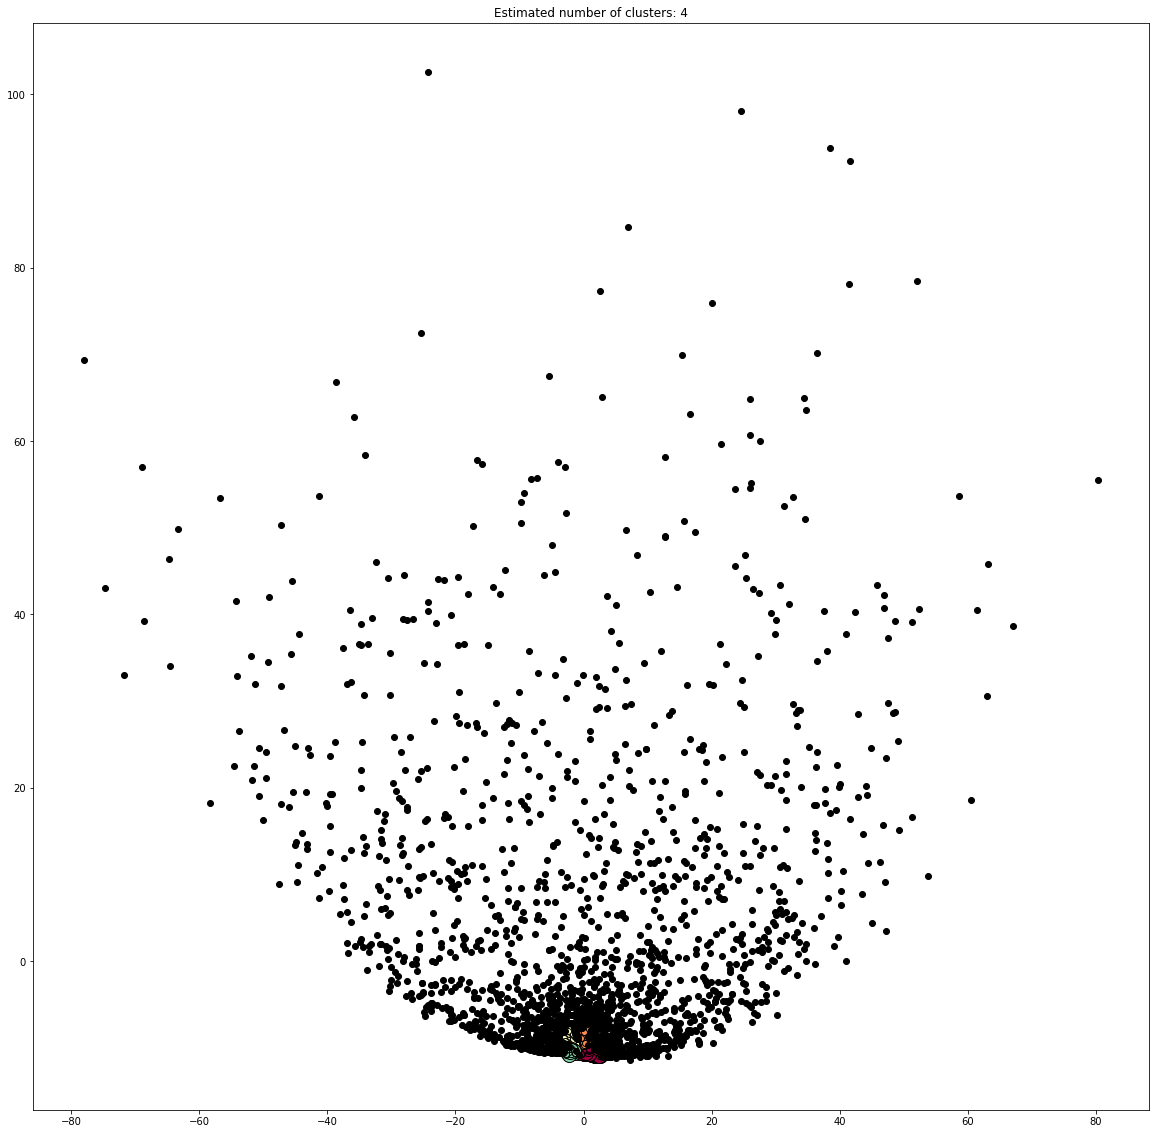

In [154]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = players_svd[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = players_svd[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Using KMeans and plotting the heatmap to see characteristics of clusters

In [369]:
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def graph_summary_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [396]:
cluster_results = kmeans_cluster(players_kmeans_processed32, 6)
cluster_summary = graph_summary_clustering(cluster_results);

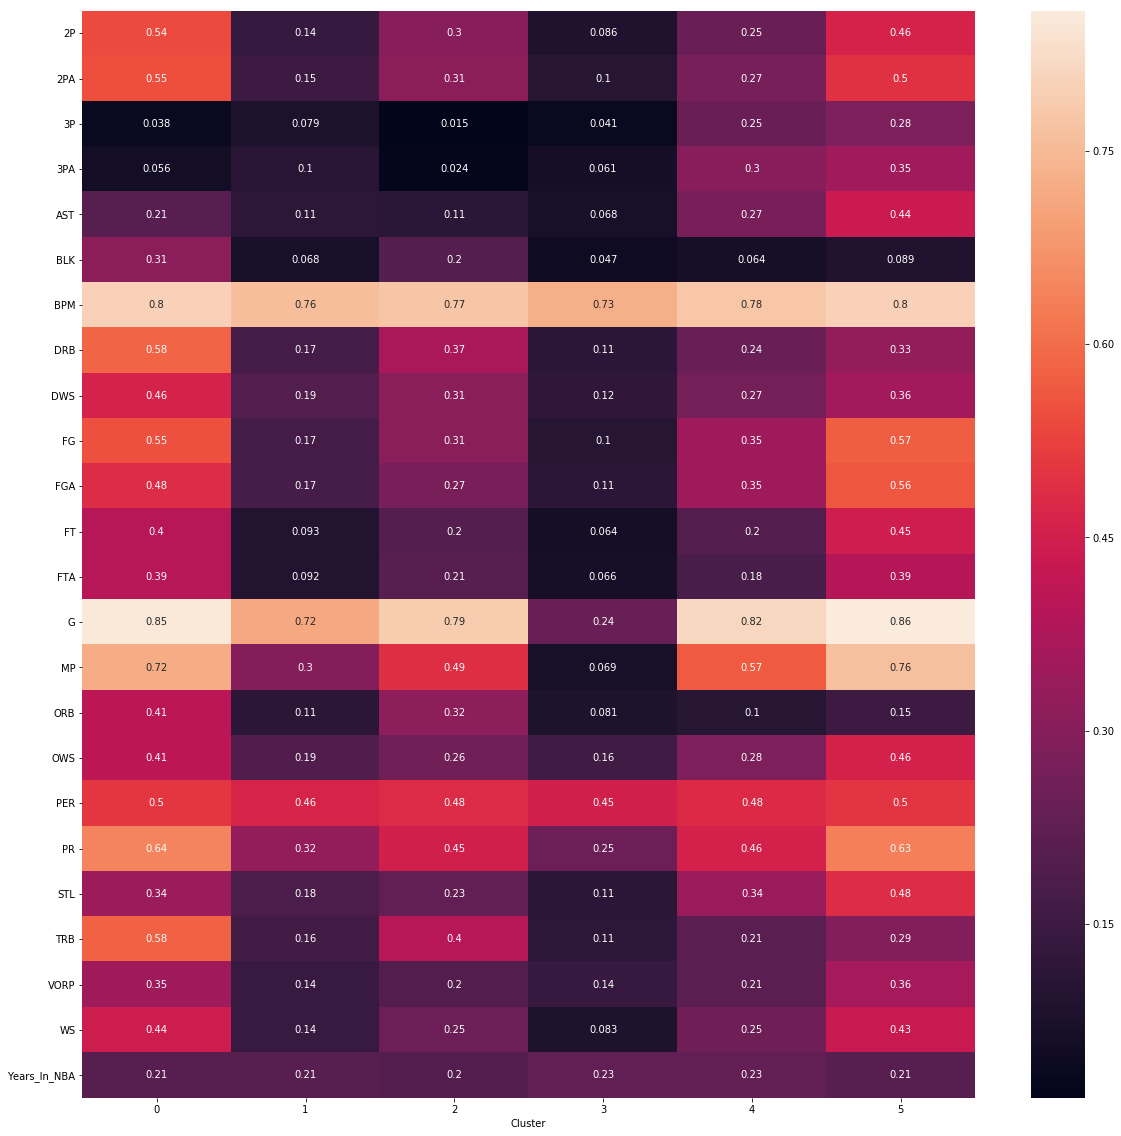

In [397]:
import seaborn as sns
sns.heatmap(cluster_summary.transpose(), annot=True);